In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading dataset
mpg = pd.read_csv('mpg.csv')

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# creating new variable for data analysis based on 'origin'
# 1 - USA, 2 - Europe, 3 - Asia
mpg['location'] = 'NULL'
for i in range(mpg.shape[0]):
    if mpg.loc[i,'origin'] == 1:
        mpg.loc[i,'location'] = 'USA'
    elif mpg.loc[i,'origin'] == 2:
        mpg.loc[i,'location'] = 'Europe'
    else:
        mpg.loc[i,'location'] = 'Asia'

In [5]:
mpg.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,location
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,USA
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,USA
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,USA
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,USA
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,USA
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,USA


In [6]:
mpg.shape

(398, 10)

In [7]:
# checking for null values
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
location        0
dtype: int64

#### It seems there are no null values in dataset

In [8]:
# checking datatypes of all the columns
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
location         object
dtype: object

#### observe that column horsepower is of object type. so it must be containing string values

In [9]:
# converting 'horsepower' column to numeric
mpg.horsepower = mpg.horsepower.apply(pd.to_numeric, errors='coerce')

In [10]:
# checking for null values again
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
location        0
dtype: int64

##### It shows 6 null values in 'horsepower' column. because of those values horsepower column was read as object type

In [11]:
# dropping NA values
mpg = mpg.dropna(axis='index')

In [12]:
mpg.shape

(392, 10)

In [13]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
location         object
dtype: object

#### now all columns has desired data types

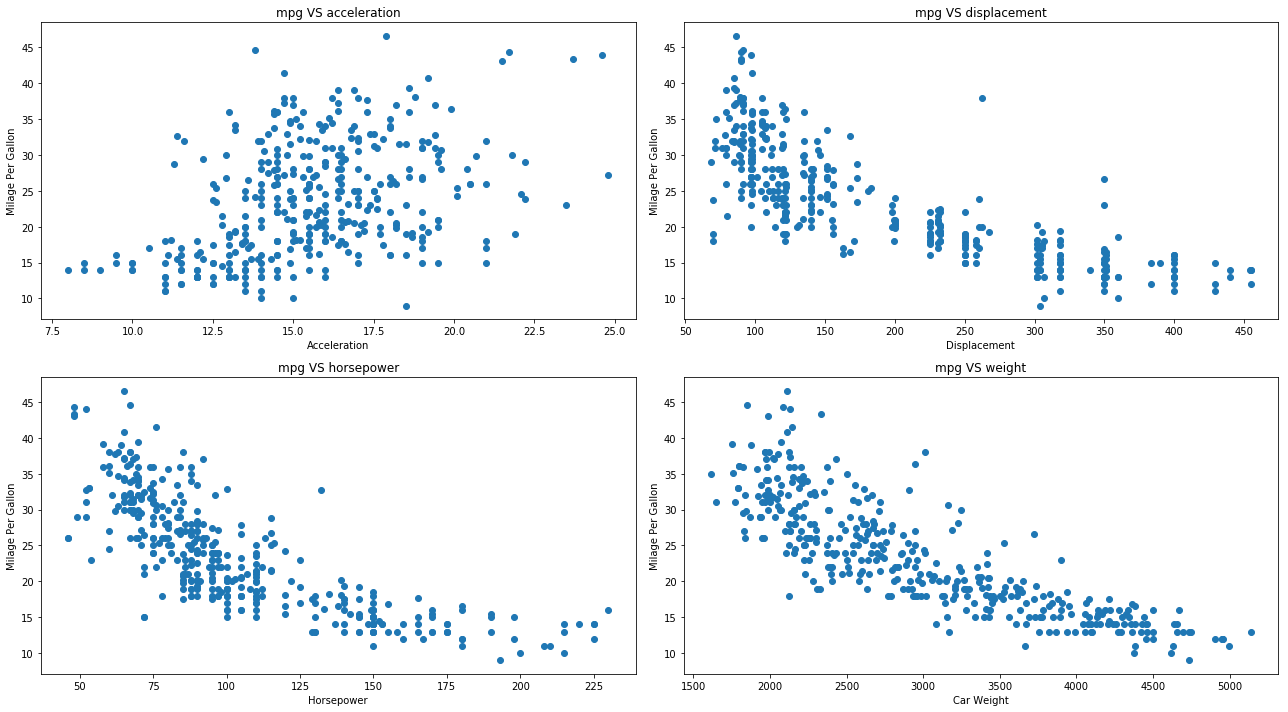

In [14]:
# plotting mileage against acceleraion, displacement, weight and horsepower
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
ax[0,0].scatter(x='acceleration', y='mpg', data=mpg)
ax[0,0].set_title('mpg VS acceleration')
ax[0,0].set_xlabel('Acceleration')
ax[0,0].set_ylabel('Milage Per Gallon')

ax[0,1].scatter(x='displacement', y='mpg', data=mpg)
ax[0,1].set_title('mpg VS displacement')
ax[0,1].set_xlabel('Displacement')
ax[0,1].set_ylabel('Milage Per Gallon')

ax[1,0].scatter(x='horsepower', y='mpg', data=mpg)
ax[1,0].set_title('mpg VS horsepower')
ax[1,0].set_xlabel('Horsepower')
ax[1,0].set_ylabel('Milage Per Gallon')

ax[1,1].scatter(x='weight', y='mpg', data=mpg)
ax[1,1].set_title('mpg VS weight')
ax[1,1].set_xlabel('Car Weight')
ax[1,1].set_ylabel('Milage Per Gallon')
plt.tight_layout()
plt.show()

##### from initial observations we can conclude that all 4 variables have negative linear relation with milaege variable

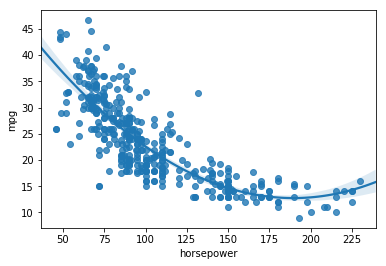

In [15]:
# plotting horsepower against mileage with order 2
sns.regplot(x='horsepower', y='mpg', data=mpg, order=2)

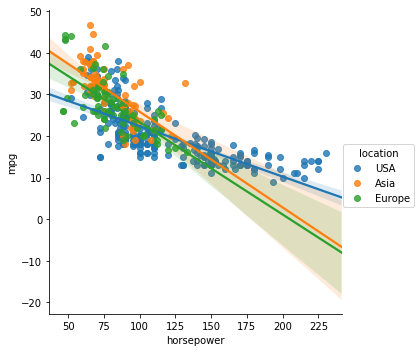

In [16]:
# horsepower against mileage for differnt 'origin' values
fig = plt.figure(figsize=(100,8))
sns.lmplot(x='horsepower', y='mpg', hue='location',data=mpg)
fig.tight_layout()

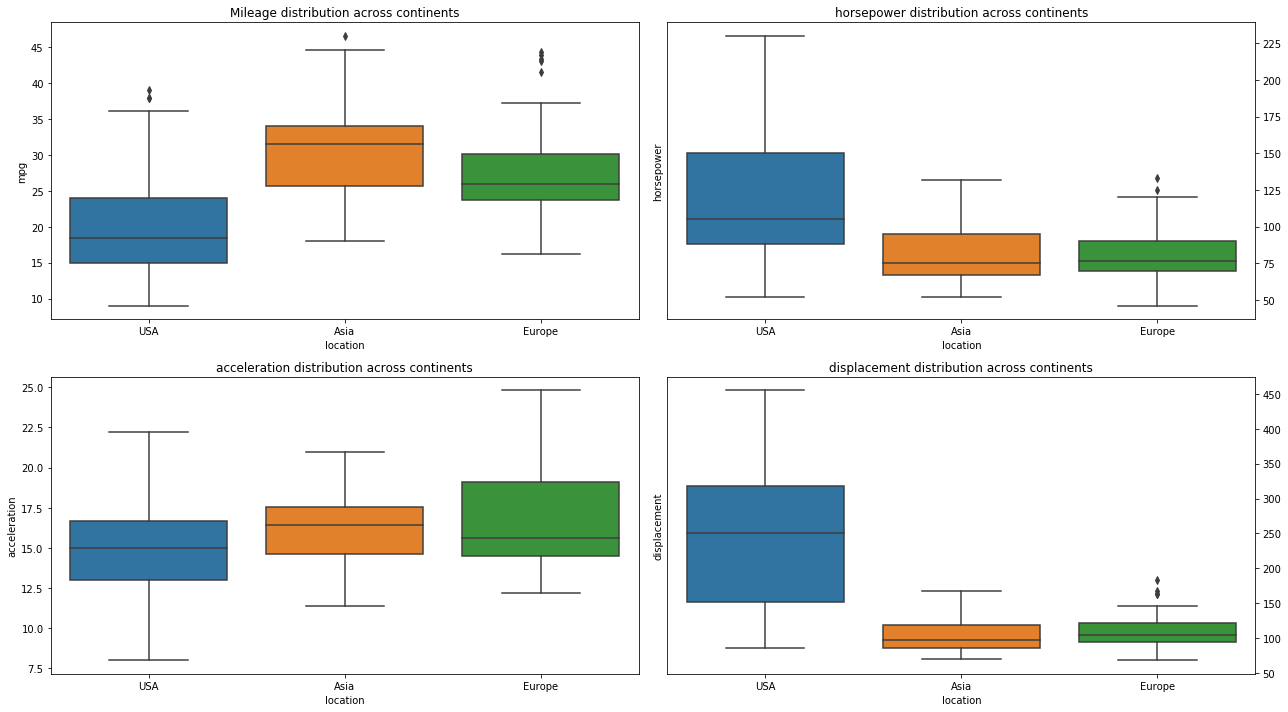

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
(ax1,ax2,ax3,ax4) = ax.flatten()
sns.boxplot(x='location', y='mpg', data=mpg, ax=ax1)
ax1.set_title('Mileage distribution across continents')

sns.boxplot(x='location', y='horsepower', data=mpg, ax=ax2)
ax2.set_title('horsepower distribution across continents')
ax2.yaxis.tick_right()

sns.boxplot(x='location', y='acceleration', data=mpg, ax=ax3)
ax3.set_title('acceleration distribution across continents')

sns.boxplot(x='location', y='displacement', data=mpg, ax=ax4)
ax4.set_title('displacement distribution across continents')
ax4.yaxis.tick_right()
fig.tight_layout()

##### Cars originated from USA are more powerful than Europe and Asia. While There mean mileage is less than europe and asia

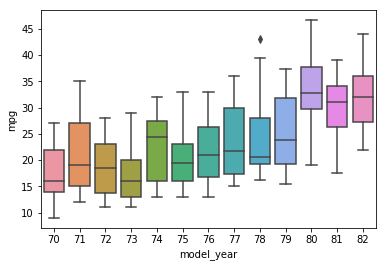

In [18]:
sns.boxplot(x='model_year', y='mpg',data=mpg)

#### as expected with each year mean mileage goes on increasing

In [19]:
# importing regression analysis libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats

In [20]:
y = mpg['mpg']
x = mpg[['cylinders','displacement','horsepower','weight','acceleration']]

In [21]:
# splitting data into training(75%) and test(25%) dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [22]:
# regression object
lm = LinearRegression()

In [23]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# coefficients of regression
coef = pd.DataFrame(lm.coef_,x.columns)
print(coef)

                     0
cylinders    -0.169934
displacement -0.002867
horsepower   -0.044523
weight       -0.005431
acceleration -0.012345


##### all the variables we used shows negative relation with mpg variable as shown in visualization
* keeping all other variale constant, with increase in one cylinder, mileage per gallon **decreases by approx. 0.17 unit.**
* keeping all other variale constant, with increase in one unit of displacement, mileage per gallon **decreases by approx. 0.002 unit.**
* keeping all other variale constant, with increase in one unit of horsepower, mileage per gallon **decreases by approx. 0.045 unit.**
* keeping all other variale constant, with increase in one unit of weight, mileage per gallon **decreases by approx. 0.005 unit.**
* keeping all other variale constant, with increase in one unit of acceleration, mileage per gallon **decreases by approx. 0.012 unit.**

In [25]:
pred = lm.predict(x_test)

In [26]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R_Square:', metrics.r2_score(y_test, pred))

RMSE: 3.80023284138
R_Square: 0.72346110866


#### R_square value suggest that above regression models ables to explain about 72% variation in mileage variable

Text(0,0.5,'Predicted Mileage')

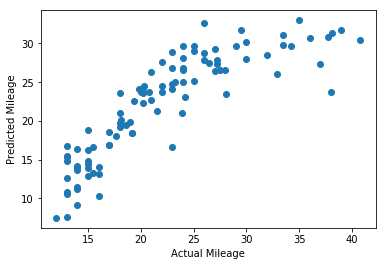

In [27]:
# plottingpredicted values against actual values
fig, ax= plt.subplots()
ax.scatter(x=y_test, y=pred)
ax.set_xlabel('Actual Mileage')
ax.set_ylabel('Predicted Mileage')

#### Trying a second regression by introducing square term for horsepower variable

In [28]:
mpg['horsepower2'] = mpg['horsepower']*mpg['horsepower']

In [29]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,location,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,USA,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,USA,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,USA,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,USA,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,USA,19600.0


In [30]:
x1 = mpg[['cylinders','displacement','horsepower','weight','acceleration', 'horsepower2']]

In [31]:
# splitting data into training and test dataset
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.25, random_state=101)

In [32]:
lm1 = LinearRegression()
lm1.fit(x1_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
coef1 = pd.DataFrame(lm1.coef_,x1.columns)
print(coef1)

                     0
cylinders     0.707141
displacement -0.031610
horsepower   -0.438666
weight       -0.000930
acceleration -0.604718
horsepower2   0.001263


In [34]:
pred1 = lm1.predict(x1_test)

In [35]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))
print('R_Square:', metrics.r2_score(y_test, pred1))

RMSE: 3.75535530909
R_Square: 0.72995392396


#### There is not much improvement in R_square value from previous model nor root mean square value decreased significantly